In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
# from data_preparation import *
# from data_splitting import *
from cross_validation_and_DL import *

Total number of instances: 2000

 Fold 1 

Epoch 1/100

Epoch 1: val_acc improved from -inf to 0.47143, saving model to best_model_cnn1.h5
35/35 - 22s - loss: 0.8847 - acc: 0.5152 - val_loss: 0.6939 - val_acc: 0.4714 - 22s/epoch - 634ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 70/100

Epoch 70: val_accuracy did not improve from 0.94286
18/18 - 1s - loss: 6.8308e-05 - accuracy: 1.0000 - val_loss: 0.6169 - val_accuracy: 0.9000 - 631ms/epoch - 35ms/step
Epoch 71/100

Epoch 71: val_accuracy did not improve from 0.94286
18/18 - 1s - loss: 6.6333e-05 - accuracy: 1.0000 - val_loss: 0.6174 - val_accuracy: 0.9000 - 640ms/epoch - 36ms/step
Epoch 72/100

Epoch 72: val_accuracy did not improve from 0.94286
18/18 - 1s - loss: 6.4054e-05 - accuracy: 1.0000 - val_loss: 0.6180 - val_accuracy: 0.9000 - 633ms/epoch - 35ms/step
Epoch 73/100

Epoch 73: val_accuracy did not improve from 0.94286
18/18 - 1s - loss: 6.2334e-05 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.9000 - 652ms/epoch - 36ms/step
Epoch 74/100

Epoch 74: val_accuracy did not improve from 0.94286
18/18 - 1s - loss: 6.0424e-05 - accuracy: 1.0000 - val_loss: 0.6233 - val_accuracy: 0.9000 - 646ms/epoch - 36ms/step
Epoch 75/100

Epoch 75: val_accura

#### Cross validation and accuracy results of the first step

In [ ]:
print(f"Average CNN Cross Validation Accuracy for first step: {np.mean(acc_scores_cnn)}")
print('CNN Test accuracy for first step:', score_cnn[1], '\n')

print(f"Average VGG16 Cross Validation Accuracy for first step: {np.mean(acc_scores_vgg16)}")
print('VGG16 Test accuracy for first step:', score_vgg16[1], '\n')

print(f"Average ResNet Cross Validation Accuracy for first step: {np.mean(acc_scores_resnet)}")
print('ResNet Test accuracy for first step:', score_resnet[1], '\n')

print(f"Average DenseNet Cross Validation Accuracy for first step: {np.mean(acc_scores_densenet)}")
print('DenseNet Test accuracy for first step:', score_densenet[1], '\n')

Average CNN Cross Validation Accuracy for first step: 0.6821428656578064
CNN Test accuracy for first step: 0.699999988079071 

Average VGG16 Cross Validation Accuracy for first step: 0.8285714387893677
VGG16 Test accuracy for first step: 0.79666668176651 

Average ResNet Cross Validation Accuracy for first step: 0.72714284658432
ResNet Test accuracy for first step: 0.6733333468437195 

Average DenseNet Cross Validation Accuracy for first step: 0.8442857146263123
DenseNet Test accuracy for first step: 0.8216666579246521 



#### Cross validation, and accuracy results of the second step

In [ ]:
print(f"Average CNN Cross Validation Accuracy for second step: {np.mean(acc_scores_cnn2)}")
print('CNN Test accuracy for  second step:', score_cnn2[1], '\n')

print(f"Average VGG16 Cross Validation Accuracy for  second step: {np.mean(acc_scores_vgg162)}")
print('VGG16 Test accuracy for  second  step:', score_vgg162[1], '\n')

print(f"Average ResNet Cross Validation Accuracy for  second step: {np.mean(acc_scores_resnet2)}")
print('ResNet Test accuracy for  second step:', score_resnet2[1], '\n')

print(f"Average DenseNet Cross Validation Accuracy for  second step: {np.mean(acc_scores_densenet2)}")
print('DenseNet Test accuracy for  second step:', score_densenet2[1], '\n')

Average CNN Cross Validation Accuracy for second step: 0.8096197366714477
CNN Test accuracy for  second step: 0.8704319000244141 

Average VGG16 Cross Validation Accuracy for  second step: 0.9156217813491822
VGG16 Test accuracy for  second  step: 0.8837209343910217 

Average ResNet Cross Validation Accuracy for  second step: 0.7839773893356323
ResNet Test accuracy for  second step: 0.7774086594581604 

Average DenseNet Cross Validation Accuracy for  second step: 0.9256320714950561
DenseNet Test accuracy for  second step: 0.9136212468147278 



#### Other Performance metrics

##### Results and plots for the first step hierarchical binary classification

In [ ]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    auc = roc_auc_score(y_true, y_pred)
    bma = balanced_accuracy_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc, bma

# Get predictions for the test data
y_pred_cnn = best_model_cnn.predict(x_test)
y_pred_vgg16 = best_model_vgg16.predict(x_test)
y_pred_resnet = best_model_vgg16.predict(x_test)
y_pred_densenet = best_model_densenet.predict(x_test)

# Convert predictions to binary values (0 or 1) using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_cnn_bin = (y_pred_cnn > threshold).astype(int)
y_pred_vgg16_bin = (y_pred_vgg16 > threshold).astype(int)
y_pred_resnet_bin = (y_pred_resnet > threshold).astype(int)
y_pred_densenet_bin = (y_pred_densenet > threshold).astype(int)

# Calculate evaluation metrics for each model on the test data
acc_cnn, prec_cnn, rec_cnn, f1_cnn, auc_cnn, bma_cnn = calculate_metrics(y_test, y_pred_cnn_bin)
acc_vgg16, prec_vgg16, rec_vgg16, f1_vgg16, auc_vgg16, bma_vgg16 = calculate_metrics(y_test, y_pred_vgg16_bin)
acc_resnet, prec_resnet, rec_resnet, f1_resnet, auc_resnet, bma_resnet = calculate_metrics(y_test, y_pred_resnet_bin)
acc_densenet, prec_densenet, rec_densenet, f1_densenet, auc_densenet, bma_densenet = calculate_metrics(y_test, y_pred_densenet_bin)

# Print evaluation metrics for each model
print("CNN Model Metrics:")
print("Accuracy:", acc_cnn)
print("Precision:", prec_cnn)
print("Recall:", rec_cnn)
print("F1-score:", f1_cnn)
print("AUC:", auc_cnn)
print("Balanced Accuracy:", bma_cnn)

print("\nVGG16 Model Metrics:")
print("Accuracy:", acc_vgg16)
print("Precision:", prec_vgg16)
print("Recall:", rec_vgg16)
print("F1-score:", f1_vgg16)
print("AUC:", auc_vgg16)
print("Balanced Accuracy:", bma_vgg16)

print("\nResNet Model Metrics:")
print("Accuracy:", acc_resnet)
print("Precision:", prec_resnet)
print("Recall:", rec_resnet)
print("F1-score:", f1_resnet)
print("AUC:", auc_resnet)
print("Balanced Accuracy:", bma_resnet)

print("\nDenseNet Model Metrics:")
print("Accuracy:", acc_densenet)
print("Precision:", prec_densenet)
print("Recall:", rec_densenet)
print("F1-score:", f1_densenet)
print("AUC:", auc_densenet)
print("Balanced Accuracy:", bma_densenet)

19/19 [==============================] - 2s 26ms/step
CNN Model Metrics:
Accuracy: 0.7
Precision: 0.654639175257732
Recall: 0.8466666666666667
F1-score: 0.7383720930232558
AUC: 0.7
Balanced Accuracy: 0.7

VGG16 Model Metrics:
Accuracy: 0.7966666666666666
Precision: 0.7730061349693251
Recall: 0.84
F1-score: 0.8051118210862621
AUC: 0.7966666666666666
Balanced Accuracy: 0.7966666666666666

ResNet Model Metrics:
Accuracy: 0.7966666666666666
Precision: 0.7730061349693251
Recall: 0.84
F1-score: 0.8051118210862621
AUC: 0.7966666666666666
Balanced Accuracy: 0.7966666666666666

DenseNet Model Metrics:
Accuracy: 0.8216666666666667
Precision: 0.8184818481848185
Recall: 0.8266666666666667
F1-score: 0.8225538971807628
AUC: 0.8216666666666665
Balanced Accuracy: 0.8216666666666667


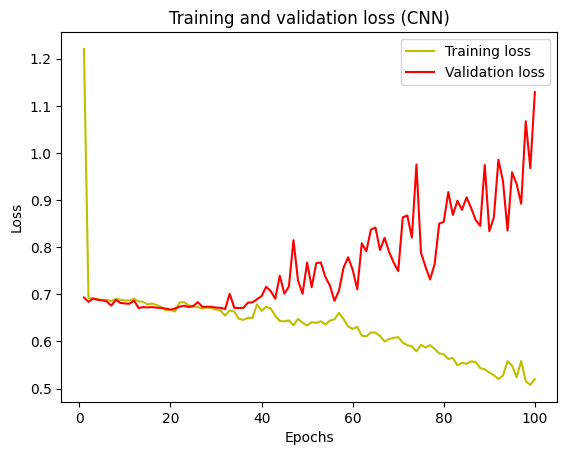

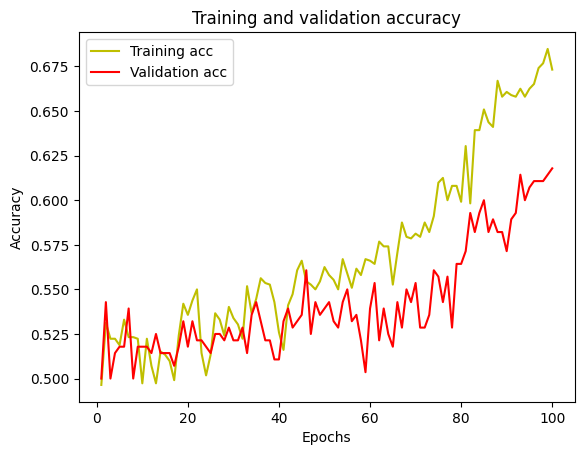

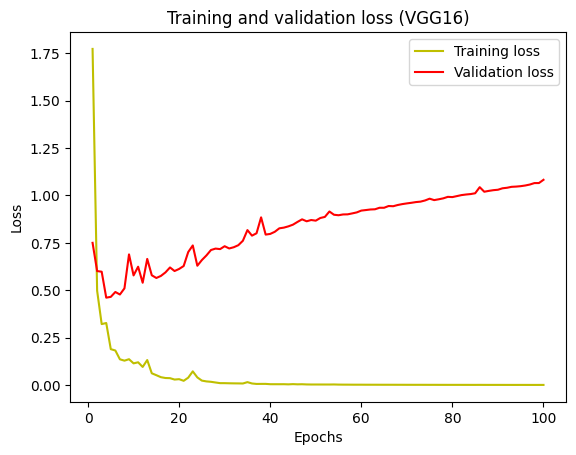

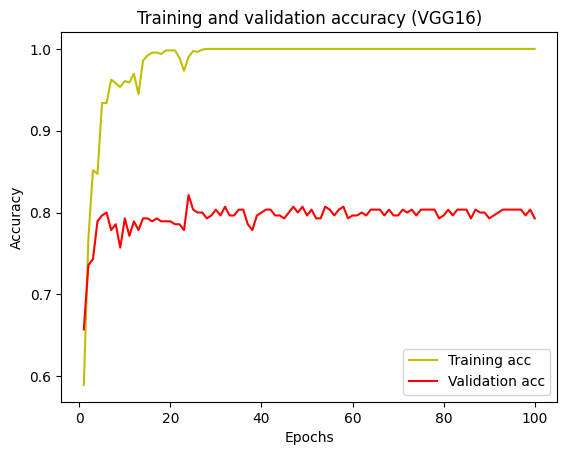

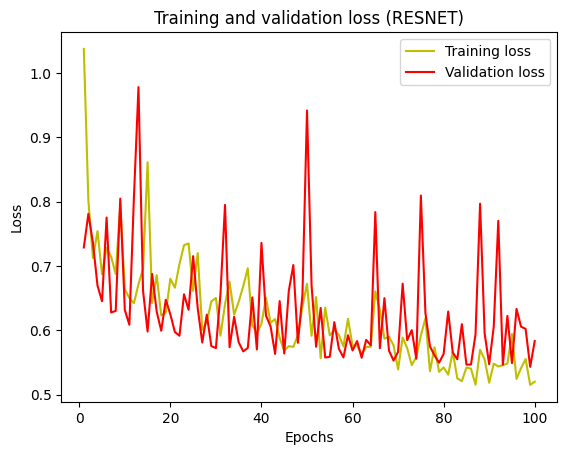

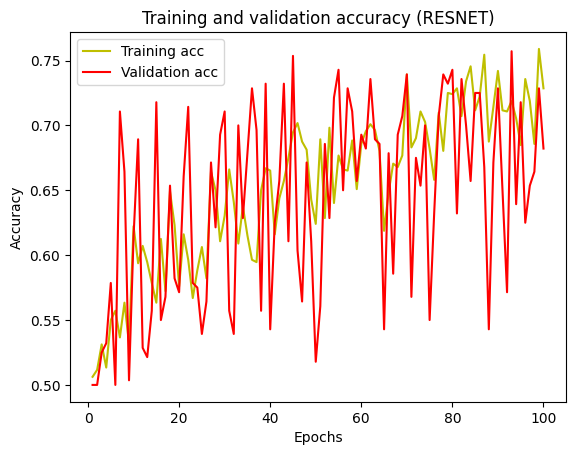

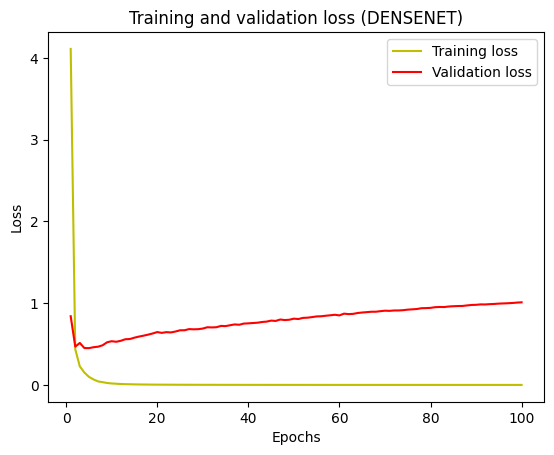

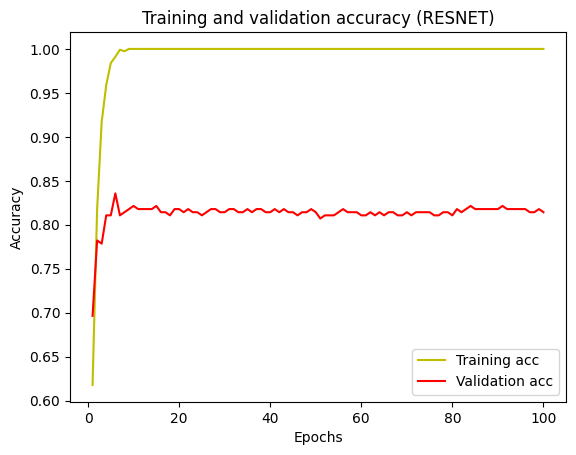

In [ ]:
# plot the training and validation accuracy and loss at each epoch for the first step classification

#CNN
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#VGG16
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_vgg16.history['acc']
val_acc = history_vgg16.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#RESNET
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#DENSENET
loss = history_densenet.history['loss']
val_loss = history_densenet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss (DENSENET)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_densenet.history['accuracy']
val_acc = history_densenet.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

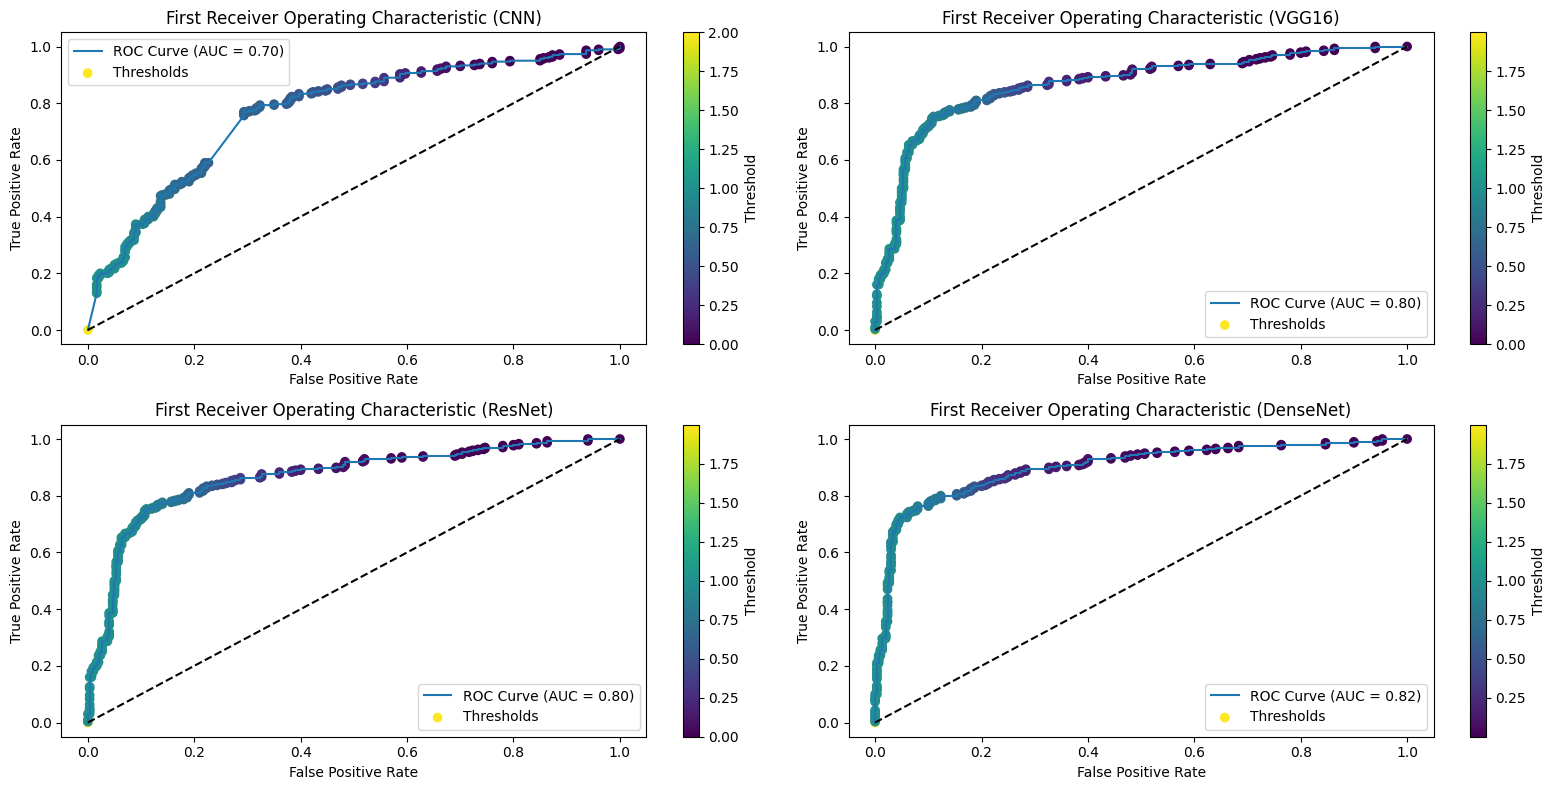

In [ ]:
# AUC Curve for the models
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# First row - CNN and VGG16
plt.subplot(2, 2, 1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
plt.plot(fpr_cnn, tpr_cnn, label="ROC Curve (AUC = {:.2f})".format(auc_cnn))
plt.scatter(fpr_cnn, tpr_cnn, c=thresholds_cnn, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (CNN)")
plt.legend()

plt.subplot(2, 2, 2)
fpr_vgg16, tpr_vgg16, thresholds_vgg16 = roc_curve(y_test, y_pred_vgg16)
plt.plot(fpr_vgg16, tpr_vgg16, label="ROC Curve (AUC = {:.2f})".format(auc_vgg16))
plt.scatter(fpr_vgg16, tpr_vgg16, c=thresholds_vgg16, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (VGG16)")
plt.legend()

# Second row - ResNet and DenseNet
plt.subplot(2, 2, 3)
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(y_test, y_pred_resnet)
plt.plot(fpr_resnet, tpr_resnet, label="ROC Curve (AUC = {:.2f})".format(auc_resnet))
plt.scatter(fpr_resnet, tpr_resnet, c=thresholds_resnet, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (ResNet)")
plt.legend()

plt.subplot(2, 2, 4)
fpr_densenet, tpr_densenet, thresholds_densenet = roc_curve(y_test, y_pred_densenet)
plt.plot(fpr_densenet, tpr_densenet, label="ROC Curve (AUC = {:.2f})".format(auc_densenet))
plt.scatter(fpr_densenet, tpr_densenet, c=thresholds_densenet, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (DenseNet)")
plt.legend()

plt.tight_layout()
plt.show()


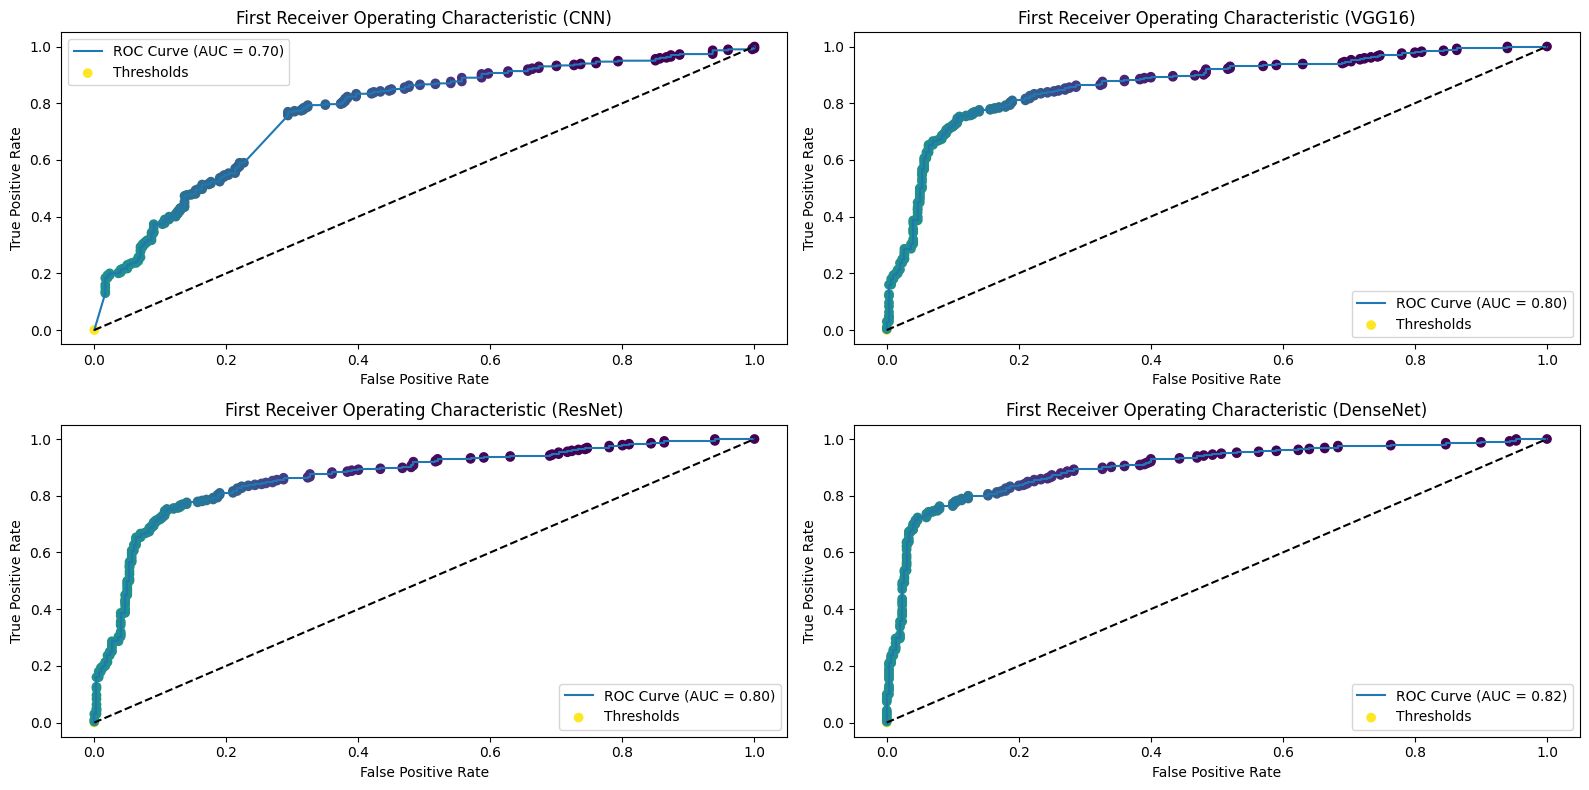

In [ ]:
# AUC Curve for the models
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# First row - CNN and VGG16
plt.subplot(2, 2, 1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
plt.plot(fpr_cnn, tpr_cnn, label="ROC Curve (AUC = {:.2f})".format(auc_cnn))
plt.scatter(fpr_cnn, tpr_cnn, c=thresholds_cnn, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (CNN)")
plt.legend()

plt.subplot(2, 2, 2)
fpr_vgg16, tpr_vgg16, thresholds_vgg16 = roc_curve(y_test, y_pred_vgg16)
plt.plot(fpr_vgg16, tpr_vgg16, label="ROC Curve (AUC = {:.2f})".format(auc_vgg16))
plt.scatter(fpr_vgg16, tpr_vgg16, c=thresholds_vgg16, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (VGG16)")
plt.legend()

# Second row - ResNet and DenseNet
plt.subplot(2, 2, 3)
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(y_test, y_pred_resnet)
plt.plot(fpr_resnet, tpr_resnet, label="ROC Curve (AUC = {:.2f})".format(auc_resnet))
plt.scatter(fpr_resnet, tpr_resnet, c=thresholds_resnet, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (ResNet)")
plt.legend()

plt.subplot(2, 2, 4)
fpr_densenet, tpr_densenet, thresholds_densenet = roc_curve(y_test, y_pred_densenet)
plt.plot(fpr_densenet, tpr_densenet, label="ROC Curve (AUC = {:.2f})".format(auc_densenet))
plt.scatter(fpr_densenet, tpr_densenet, c=thresholds_densenet, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("First Receiver Operating Characteristic (DenseNet)")
plt.legend()

plt.tight_layout()
plt.show()


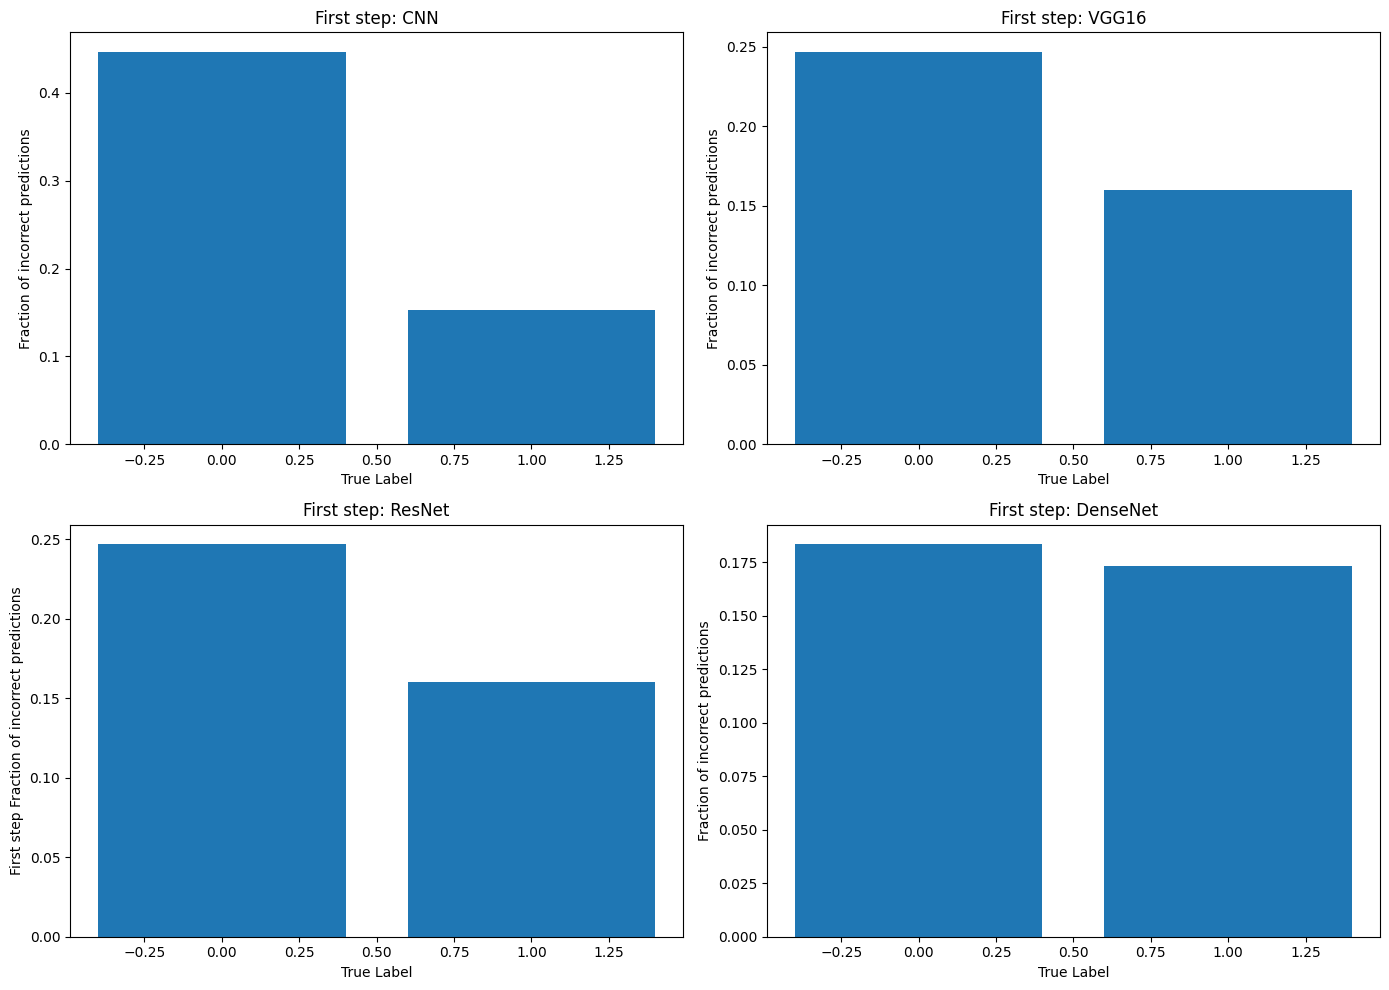

In [ ]:
# Plot fractional incorrect misclassifications for all the models
plt.figure(figsize=(14, 10))

# CNN
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred_cnn_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('First step: CNN')

# VGG16
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, y_pred_vgg16_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('First step: VGG16')

# ResNet
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred_resnet_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('First step Fraction of incorrect predictions')
plt.title('First step: ResNet')

# DenseNet
plt.subplot(2, 2, 4)
cm = confusion_matrix(y_test, y_pred_densenet_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('First step: DenseNet')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_cnn = confusion_matrix(y_test, y_pred_cnn_bin)
cm_vgg16 = confusion_matrix(y_test, y_pred_vgg16_bin)
cm_resnet = confusion_matrix(y_test, y_pred_resnet_bin)
cm_densenet = confusion_matrix(y_test, y_pred_densenet_bin)

# Define a function to calculate metrics
def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    total = TP + TN + FP + FN
    incorrect_fraction = (FP + FN) / total
    return TP, TN, FP, FN, incorrect_fraction

# Create a DataFrame to store the metrics
data = {
    'Model': ['CNN', 'VGG16', 'ResNet', 'DenseNet'],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Fraction of Incorrect Predictions': [],
}

# Calculate metrics for each model
for cm, model in zip([cm_cnn, cm_vgg16, cm_resnet, cm_densenet], data['Model']):
    TP, TN, FP, FN, incorrect_fraction = calculate_metrics(cm)
    data['TP'].append(TP)
    data['TN'].append(TN)
    data['FP'].append(FP)
    data['FN'].append(FN)
    data['Fraction of Incorrect Predictions'].append(incorrect_fraction)

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Print the DataFrame
print(metrics_df)


      Model   TP   TN   FP  FN  Fraction of Incorrect Predictions
0       CNN  254  166  134  46                           0.300000
1     VGG16  252  226   74  48                           0.203333
2    ResNet  252  226   74  48                           0.203333
3  DenseNet  248  245   55  52                           0.178333


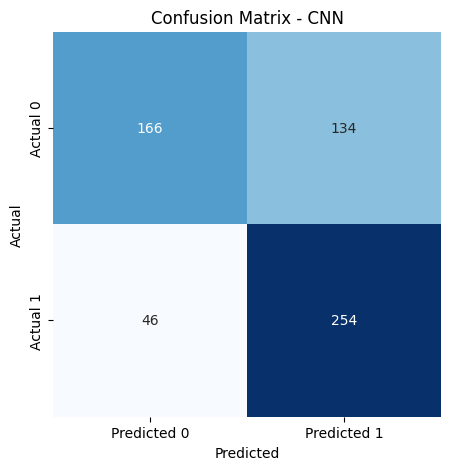

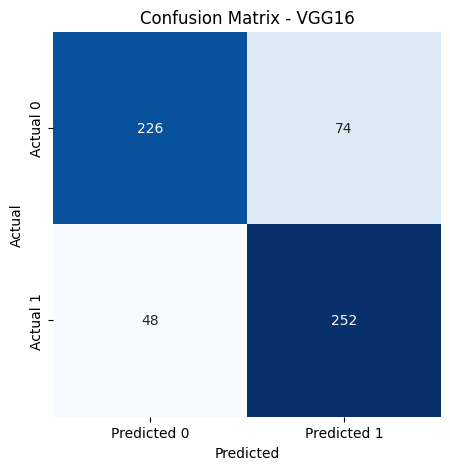

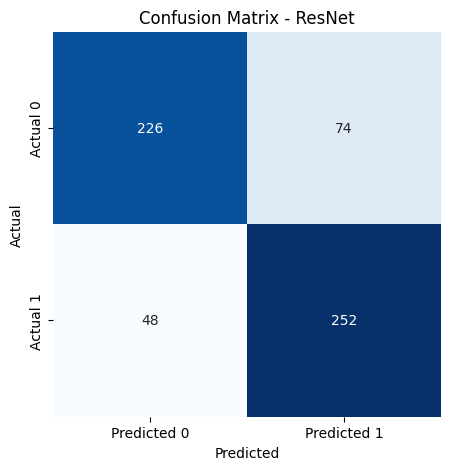

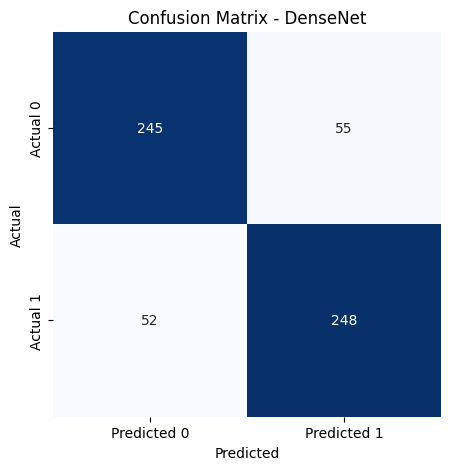

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    total = TP + TN + FP + FN
    incorrect_fraction = (FP + FN) / total if total != 0 else 0
    return TP, TN, FP, FN, incorrect_fraction

# Function to display confusion matrix as a plot
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()# Display confusion matrix plots for each model
for cm, model in zip([cm_cnn, cm_vgg16, cm_resnet, cm_densenet], data['Model']):
    plot_confusion_matrix(cm, model)

##### Results and plots for the second step hierarchical binary classification

In [ ]:
# Get predictions for the test data for the second step
y_pred_cnn_step2 = best_model_cnn2.predict(x_test_step2)
y_pred_vgg16_step2 = best_model_vgg162.predict(x_test_step2)
y_pred_resnet_step2 = best_model_resnet2.predict(x_test_step2)
y_pred_densenet_step2 = best_model_densenet2.predict(x_test_step2)

# Convert predictions to binary values (0 or 1) using a threshold (e.g., 0.5)
y_pred_cnn_step2_bin = (y_pred_cnn_step2 > threshold).astype(int)
y_pred_vgg16_step2_bin = (y_pred_vgg16_step2 > threshold).astype(int)
y_pred_resnet_step2_bin = (y_pred_resnet_step2 > threshold).astype(int)
y_pred_densenet_step2_bin = (y_pred_densenet_step2 > threshold).astype(int)

# Calculate evaluation metrics for each model on the test data for the second step
acc_cnn_step2, prec_cnn_step2, rec_cnn_step2, f1_cnn_step2, auc_cnn_step2, bma_cnn_step2 = calculate_metrics(y_test_step2, y_pred_cnn_step2_bin)
acc_vgg16_step2, prec_vgg16_step2, rec_vgg16_step2, f1_vgg16_step2, auc_vgg16_step2, bma_vgg16_step2 = calculate_metrics(y_test_step2, y_pred_vgg16_step2_bin)
acc_resnet_step2, prec_resnet_step2, rec_resnet_step2, f1_resnet_step2, auc_resnet_step2, bma_resnet_step2 = calculate_metrics(y_test_step2, y_pred_resnet_step2_bin)
acc_densenet_step2, prec_densenet_step2, rec_densenet_step2, f1_densenet_step2, auc_densenet_step2, bma_densenet_step2 = calculate_metrics(y_test_step2, y_pred_densenet_step2_bin)

# Print evaluation metrics for each model for the second step
print("CNN Model Metrics for the Second Step:")
print("Accuracy:", acc_cnn_step2)
print("Precision:", prec_cnn_step2)
print("Recall:", rec_cnn_step2)
print("F1-score:", f1_cnn_step2)
print("AUC:", auc_cnn_step2)
print("Balanced Accuracy:", bma_cnn_step2)

print("\nVGG16 Model Metrics for the Second Step:")
print("Accuracy:", acc_vgg16_step2)
print("Precision:", prec_vgg16_step2)
print("Recall:", rec_vgg16_step2)
print("F1-score:", f1_vgg16_step2)
print("AUC:", auc_vgg16_step2)
print("Balanced Accuracy:", bma_vgg16_step2)

print("\nResNet Model Metrics for the Second Step:")
print("Accuracy:", acc_resnet_step2)
print("Precision:", prec_resnet_step2)
print("Recall:", rec_resnet_step2)
print("F1-score:", f1_resnet_step2)
print("AUC:", auc_resnet_step2)
print("Balanced Accuracy:", bma_resnet_step2)

print("\nDenseNet Model Metrics for the Second Step:")
print("Accuracy:", acc_densenet_step2)
print("Precision:", prec_densenet_step2)
print("Recall:", rec_densenet_step2)
print("F1-score:", f1_densenet_step2)
print("AUC:", auc_densenet_step2)
print("Balanced Accuracy:", bma_densenet_step2)

10/10 [==============================] - 2s 29ms/step
CNN Model Metrics for the Second Step:
Accuracy: 0.8704318936877077
Precision: 0.8362068965517241
Recall: 0.8290598290598291
F1-score: 0.8326180257510729
AUC: 0.8628994797473059
Balanced Accuracy: 0.8628994797473059

VGG16 Model Metrics for the Second Step:
Accuracy: 0.8837209302325582
Precision: 0.8059701492537313
Recall: 0.9230769230769231
F1-score: 0.8605577689243029
AUC: 0.8908862876254181
Balanced Accuracy: 0.8908862876254181

ResNet Model Metrics for the Second Step:
Accuracy: 0.7774086378737541
Precision: 0.7551020408163265
Recall: 0.6324786324786325
F1-score: 0.6883720930232557
AUC: 0.7510219249349684
Balanced Accuracy: 0.7510219249349683

DenseNet Model Metrics for the Second Step:
Accuracy: 0.9136212624584718
Precision: 0.8421052631578947
Recall: 0.9572649572649573
F1-score: 0.8959999999999999
AUC: 0.9215672612411744
Balanced Accuracy: 0.9215672612411743


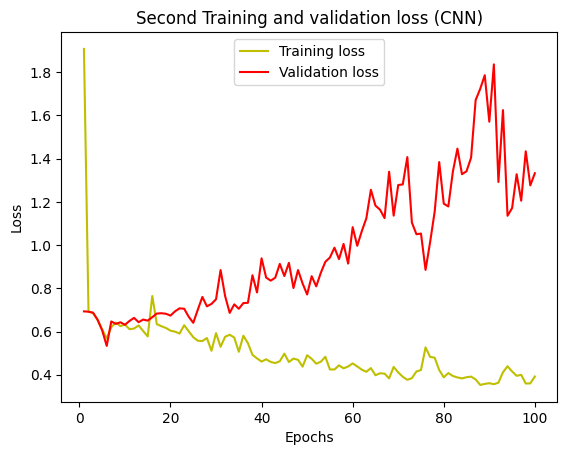

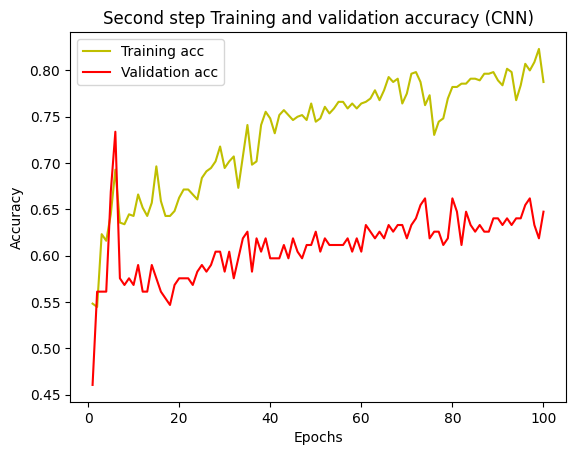

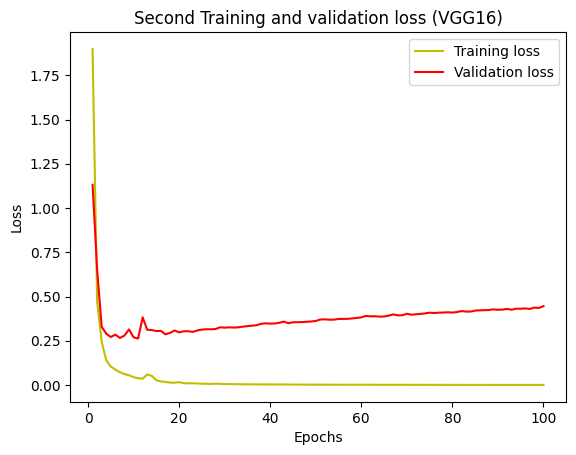

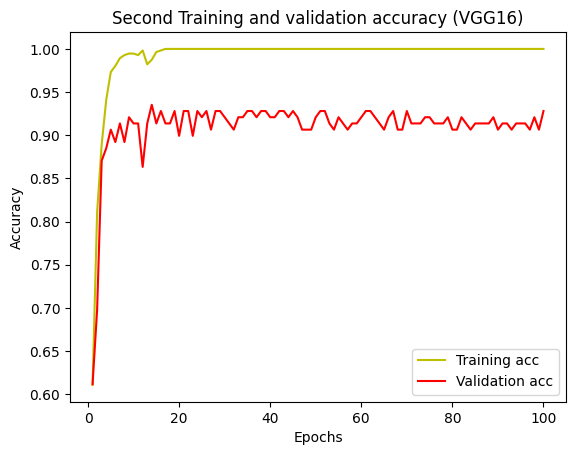

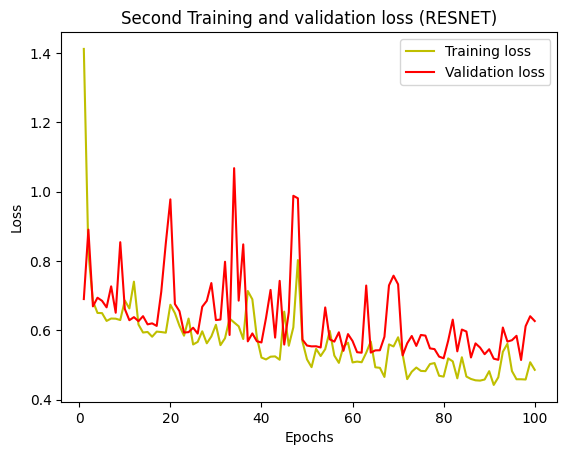

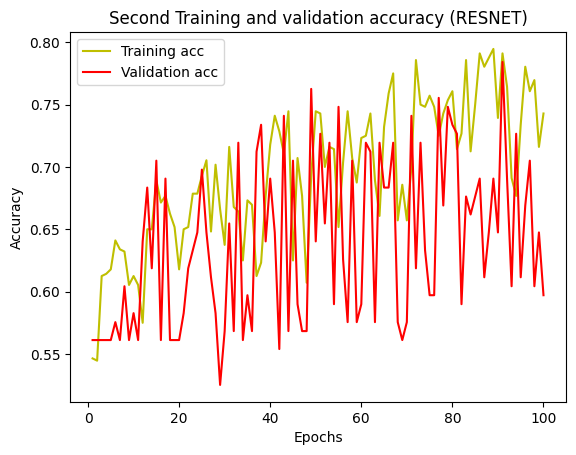

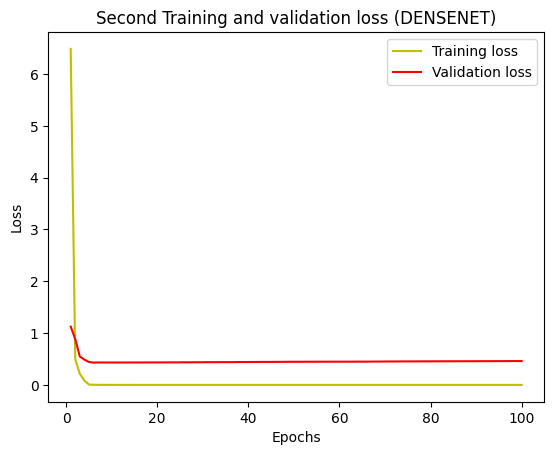

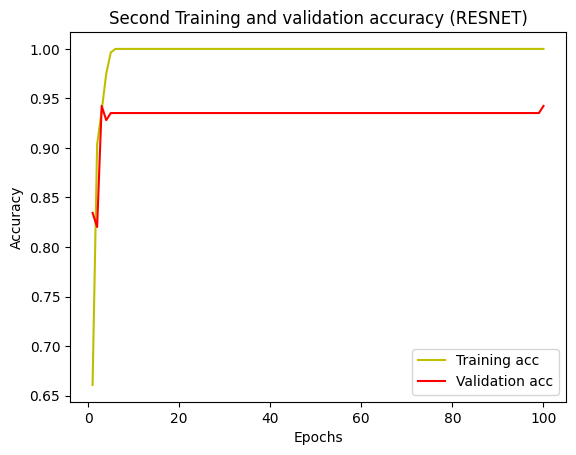

In [ ]:
# plot the training and validation accuracy and loss at each epoch for the second step classification

#CNN
loss2 = history_cnn2.history['loss']
val_loss2 = history_cnn2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'y', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Second Training and validation loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc2 = history_cnn2.history['acc']
val_acc2 = history_cnn2.history['val_acc']
plt.plot(epochs2, acc2, 'y', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Second step Training and validation accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#VGG16
loss2 = history_vgg162.history['loss']
val_loss2 = history_vgg162.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'y', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Second Training and validation loss (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc2 = history_vgg162.history['acc']
val_acc2 = history_vgg162.history['val_acc']
plt.plot(epochs2, acc2, 'y', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Second Training and validation accuracy (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#RESNET
loss2 = history_resnet2.history['loss']
val_loss2 = history_resnet2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'y', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Second Training and validation loss (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc2 = history_resnet2.history['accuracy']
val_acc2 = history_resnet2.history['val_accuracy']
plt.plot(epochs2, acc2, 'y', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Second Training and validation accuracy (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#DENSENET
loss2 = history_densenet2.history['loss']
val_loss2 = history_densenet2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'y', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Second Training and validation loss (DENSENET)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc2 = history_densenet2.history['accuracy']
val_acc2 = history_densenet2.history['val_accuracy']
plt.plot(epochs2, acc2, 'y', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Second Training and validation accuracy (RESNET)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

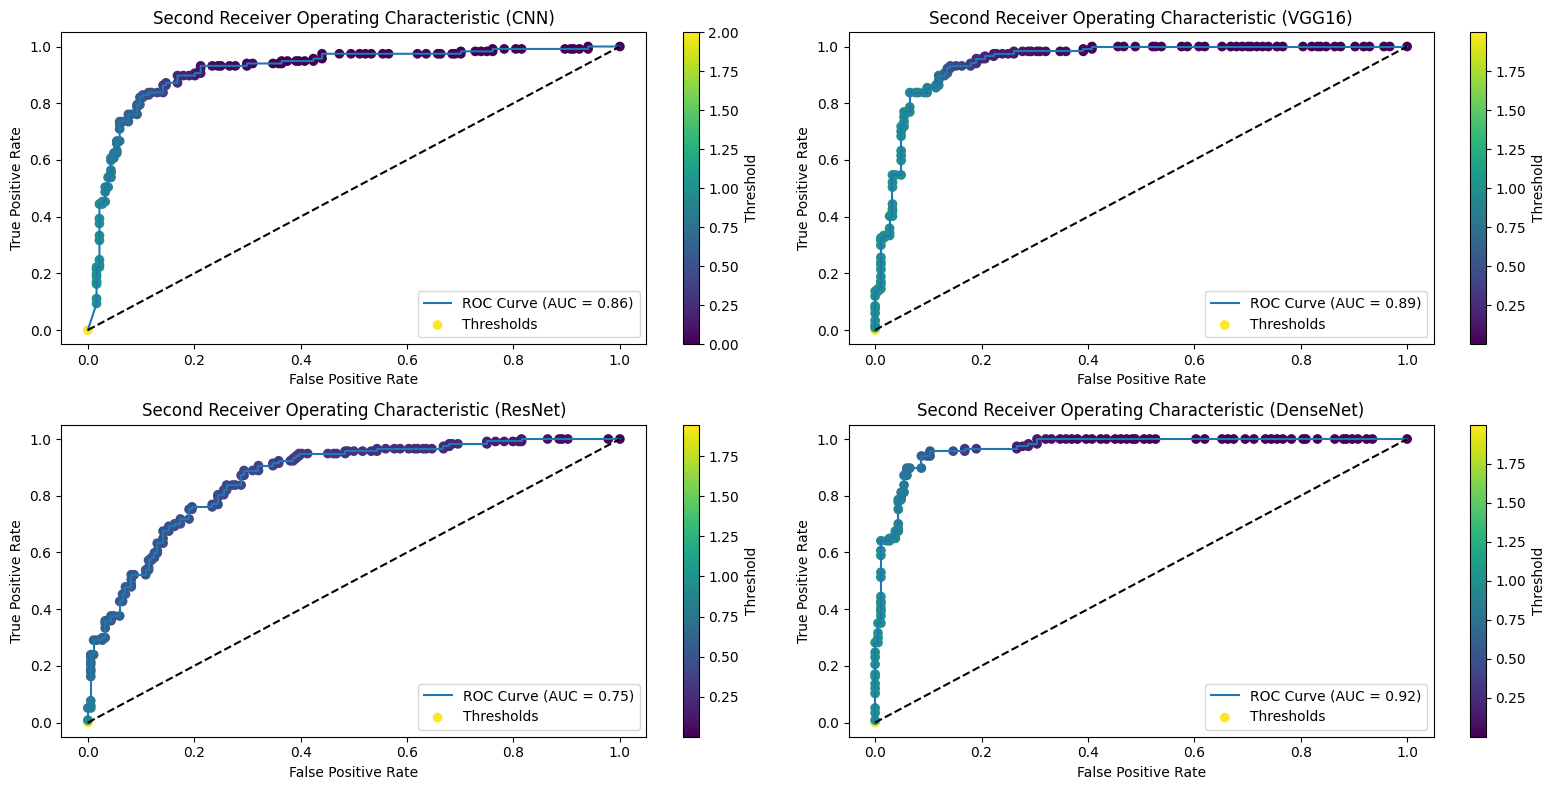

In [ ]:
plt.figure(figsize=(16, 8))

# First row - CNN and VGG16
plt.subplot(2, 2, 1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test_step2, y_pred_cnn_step2)
plt.plot(fpr_cnn, tpr_cnn, label="ROC Curve (AUC = {:.2f})".format(auc_cnn_step2))
plt.scatter(fpr_cnn, tpr_cnn, c=thresholds_cnn, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (CNN)")
plt.legend()

plt.subplot(2, 2, 2)
fpr_vgg16, tpr_vgg16, thresholds_vgg16 = roc_curve(y_test_step2, y_pred_vgg16_step2)
plt.plot(fpr_vgg16, tpr_vgg16, label="ROC Curve (AUC = {:.2f})".format(auc_vgg16_step2))
plt.scatter(fpr_vgg16, tpr_vgg16, c=thresholds_vgg16, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (VGG16)")
plt.legend()

# Second row - ResNet and DenseNet
plt.subplot(2, 2, 3)
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(y_test_step2, y_pred_resnet_step2)
plt.plot(fpr_resnet, tpr_resnet, label="ROC Curve (AUC = {:.2f})".format(auc_resnet_step2))
plt.scatter(fpr_resnet, tpr_resnet, c=thresholds_resnet, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (ResNet)")
plt.legend()

plt.subplot(2, 2, 4)
fpr_densenet, tpr_densenet, thresholds_densenet = roc_curve(y_test_step2, y_pred_densenet_step2)
plt.plot(fpr_densenet, tpr_densenet, label="ROC Curve (AUC = {:.2f})".format(auc_densenet_step2))
plt.scatter(fpr_densenet, tpr_densenet, c=thresholds_densenet, cmap='viridis', label='Thresholds')
plt.colorbar(label='Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (DenseNet)")
plt.legend()

plt.tight_layout()
plt.show()


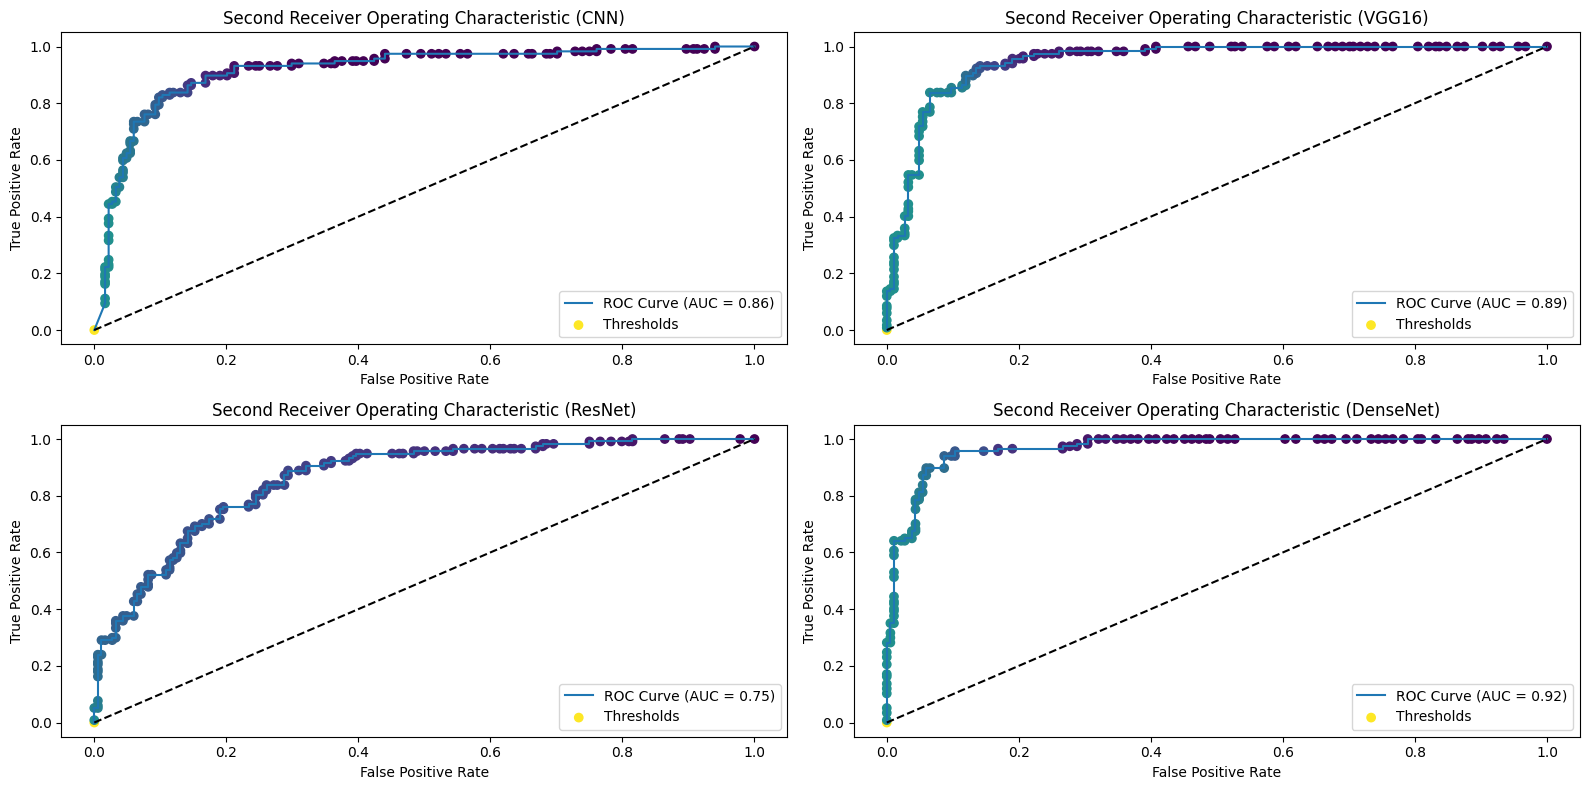

In [ ]:
plt.figure(figsize=(16, 8))

# First row - CNN and VGG16
plt.subplot(2, 2, 1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test_step2, y_pred_cnn_step2)
plt.plot(fpr_cnn, tpr_cnn, label="ROC Curve (AUC = {:.2f})".format(auc_cnn_step2))
plt.scatter(fpr_cnn, tpr_cnn, c=thresholds_cnn, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (CNN)")
plt.legend()

plt.subplot(2, 2, 2)
fpr_vgg16, tpr_vgg16, thresholds_vgg16 = roc_curve(y_test_step2, y_pred_vgg16_step2)
plt.plot(fpr_vgg16, tpr_vgg16, label="ROC Curve (AUC = {:.2f})".format(auc_vgg16_step2))
plt.scatter(fpr_vgg16, tpr_vgg16, c=thresholds_vgg16, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (VGG16)")
plt.legend()

# Second row - ResNet and DenseNet
plt.subplot(2, 2, 3)
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(y_test_step2, y_pred_resnet_step2)
plt.plot(fpr_resnet, tpr_resnet, label="ROC Curve (AUC = {:.2f})".format(auc_resnet_step2))
plt.scatter(fpr_resnet, tpr_resnet, c=thresholds_resnet, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (ResNet)")
plt.legend()

plt.subplot(2, 2, 4)
fpr_densenet, tpr_densenet, thresholds_densenet = roc_curve(y_test_step2, y_pred_densenet_step2)
plt.plot(fpr_densenet, tpr_densenet, label="ROC Curve (AUC = {:.2f})".format(auc_densenet_step2))
plt.scatter(fpr_densenet, tpr_densenet, c=thresholds_densenet, cmap='viridis', label='Thresholds')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Second Receiver Operating Characteristic (DenseNet)")
plt.legend()

plt.tight_layout()
plt.show()


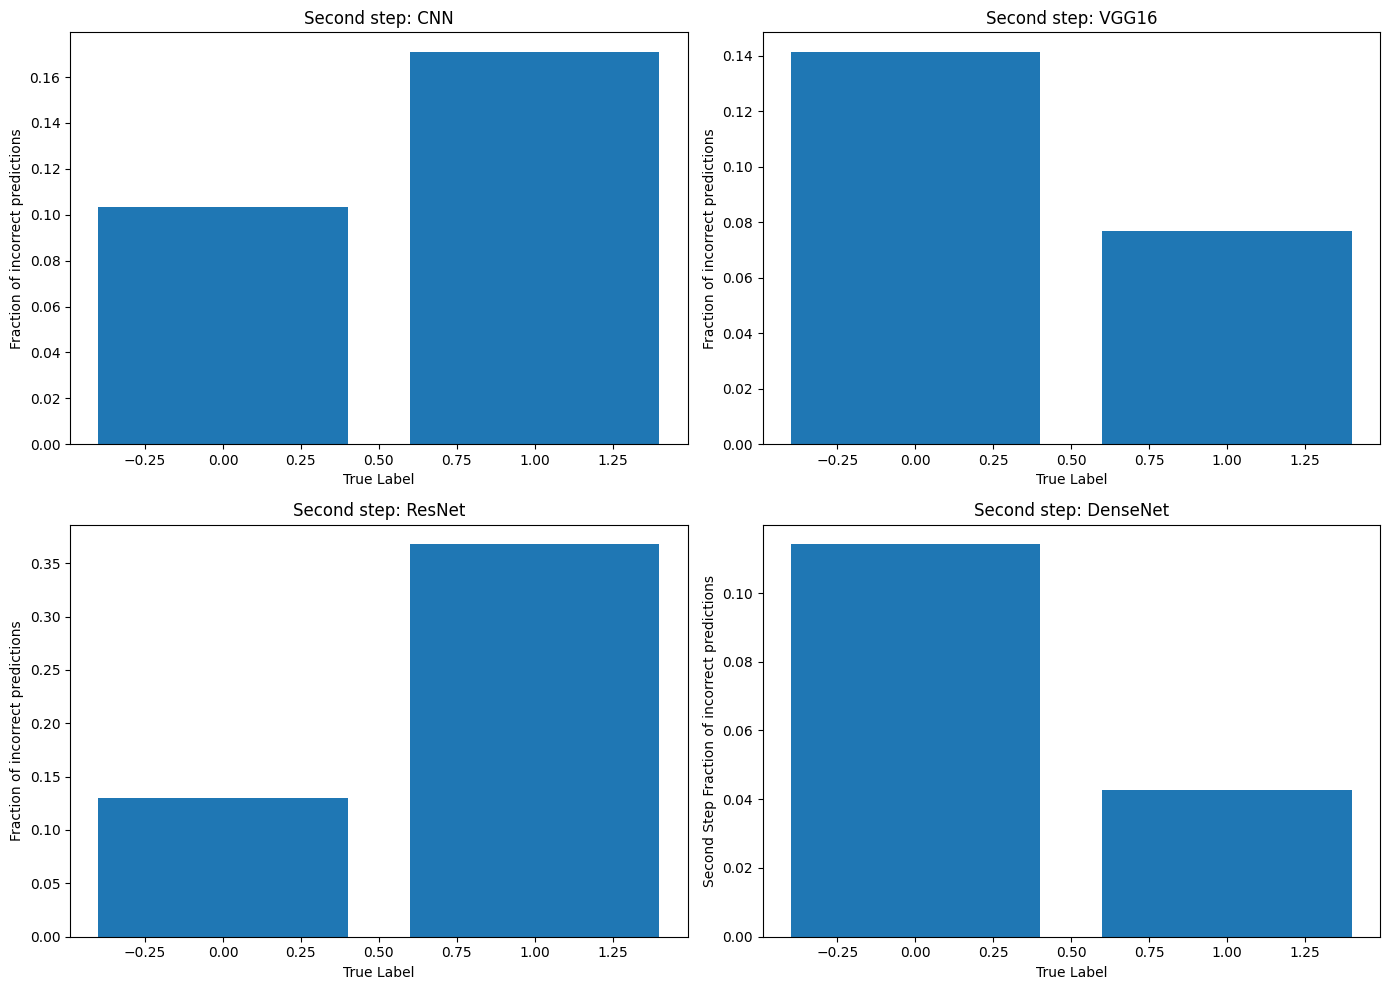

In [ ]:
# Plot fractional incorrect misclassifications for all the models
plt.figure(figsize=(14, 10))

# CNN
plt.subplot(2, 2, 1)
cm2 = confusion_matrix(y_test_step2, y_pred_cnn_step2_bin)
incorr_fraction = 1 - np.diag(cm2) / np.sum(cm2, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Second step: CNN')

# VGG16
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test_step2, y_pred_vgg16_step2_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Second step: VGG16')

# ResNet
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test_step2, y_pred_resnet_step2_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Second step: ResNet')

# DenseNet
plt.subplot(2, 2, 4)
cm = confusion_matrix(y_test_step2, y_pred_densenet_step2_bin)
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Second Step Fraction of incorrect predictions')
plt.title('Second step: DenseNet')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for the second step
cm_cnn_step2 = confusion_matrix(y_test_step2, y_pred_cnn_step2_bin)
cm_vgg16_step2 = confusion_matrix(y_test_step2, y_pred_vgg16_step2_bin)
cm_resnet_step2 = confusion_matrix(y_test_step2, y_pred_resnet_step2_bin)
cm_densenet_step2 = confusion_matrix(y_test_step2, y_pred_densenet_step2_bin)

# Create a DataFrame to store the metrics for the second step
data_step2 = {
    'Model': ['CNN', 'VGG16', 'ResNet', 'DenseNet'],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Fraction of Incorrect Predictions': [],
}

# Calculate metrics for the second step for each model
for cm, model in zip([cm_cnn_step2, cm_vgg16_step2, cm_resnet_step2, cm_densenet_step2], data_step2['Model']):
    TP, TN, FP, FN, incorrect_fraction = calculate_metrics(cm)
    data_step2['TP'].append(TP)
    data_step2['TN'].append(TN)
    data_step2['FP'].append(FP)
    data_step2['FN'].append(FN)
    data_step2['Fraction of Incorrect Predictions'].append(incorrect_fraction)

# Create a DataFrame for the second step
metrics_df_step2 = pd.DataFrame(data_step2)

# Print the DataFrame for the second step
print(metrics_df_step2)


      Model   TP   TN  FP  FN  Fraction of Incorrect Predictions
0       CNN   97  165  19  20                           0.129568
1     VGG16  108  158  26   9                           0.116279
2    ResNet   74  160  24  43                           0.222591
3  DenseNet  112  163  21   5                           0.086379


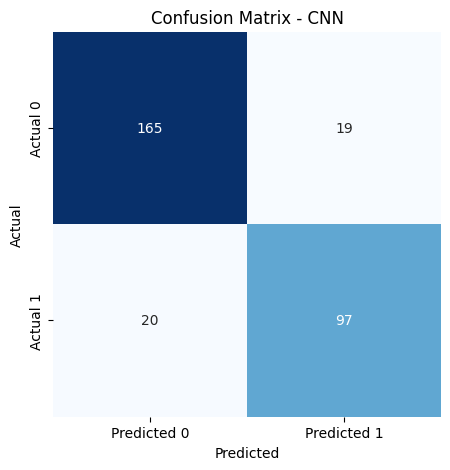

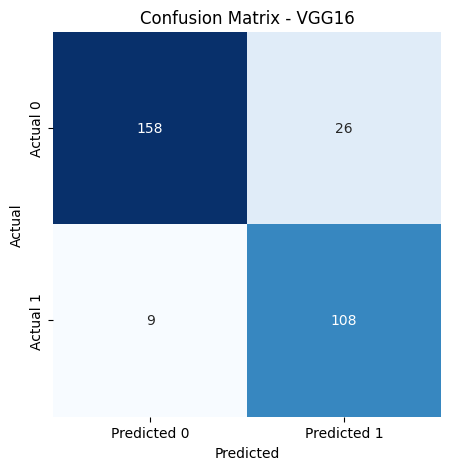

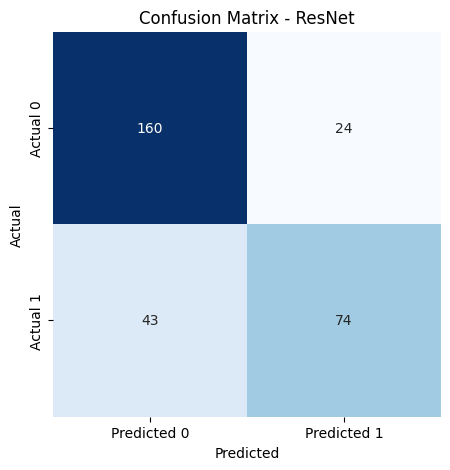

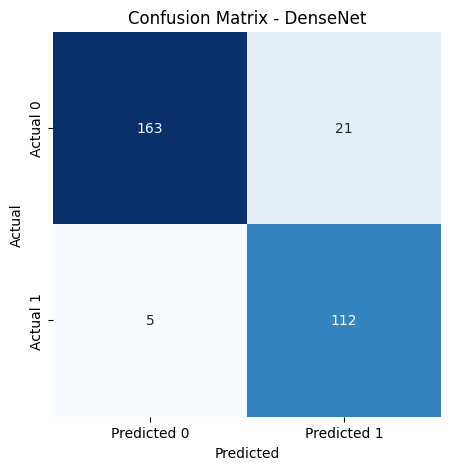

In [ ]:
# Display confusion matrix plots for each model
for cm, model in zip([cm_cnn_step2, cm_vgg16_step2, cm_resnet_step2, cm_densenet_step2], data_step2['Model']):
    plot_confusion_matrix(cm, model)


### OVERALL BALANCED MULTICLASS ACCURACY

In [ ]:
# Calculate the accuracy for each class (Benign, Melanoma, Seborrheic) and BMA for each model
models = ['CNN', 'VGG16', 'ResNet', 'DenseNet']

for model_name in models:
    print(f"\nMetrics for {model_name} Model:")

    # First Step (Benign vs Others)
    y_pred_bin = globals()[f"y_pred_{model_name.lower()}_bin"]
    cm_first = confusion_matrix(y_test, y_pred_bin)
    TN = cm_first[0, 0]
    FP = cm_first[0, 1]
    FN = cm_first[1, 0]
    TP = cm_first[1, 1]

    benign_accuracy = TN / (TN + FP)
    print('The accuracy of the benign class in the first step is:', benign_accuracy)

    # Second Step (Melanoma vs Seborrheic)
    y_pred_step2_bin = globals()[f"y_pred_{model_name.lower()}_step2_bin"]
    cm_second = confusion_matrix(y_test_step2, y_pred_step2_bin)
    TN_2 = cm_second[0, 0]
    FP_2 = cm_second[0, 1]
    FN_2 = cm_second[1, 0]
    TP_2 = cm_second[1, 1]

    melanoma_accuracy = TN_2 / (TN_2 + FP_2)
    print('The accuracy of the melanoma class in the second step is:', melanoma_accuracy)

    seborrheic_accuracy = TP_2 / (TP_2 + FN_2)
    print('The accuracy of the seborrheic class in the second step is:', seborrheic_accuracy)
    # Calculate BMA
    bma = 1/3 * (benign_accuracy + melanoma_accuracy + seborrheic_accuracy)
    print('Balanced Model Accuracy (BMA):', bma)


Metrics for CNN Model:
The accuracy of the benign class in the first step is: 0.5533333333333333
The accuracy of the melanoma class in the second step is: 0.8967391304347826
The accuracy of the seborrheic class in the second step is: 0.8290598290598291
Balanced Model Accuracy (BMA): 0.7597107642759817

Metrics for VGG16 Model:
The accuracy of the benign class in the first step is: 0.7533333333333333
The accuracy of the melanoma class in the second step is: 0.8586956521739131
The accuracy of the seborrheic class in the second step is: 0.9230769230769231
Balanced Model Accuracy (BMA): 0.8450353028613897

Metrics for ResNet Model:
The accuracy of the benign class in the first step is: 0.7533333333333333
The accuracy of the melanoma class in the second step is: 0.8695652173913043
The accuracy of the seborrheic class in the second step is: 0.6324786324786325
Balanced Model Accuracy (BMA): 0.75179239440109

Metrics for DenseNet Model:
The accuracy of the benign class in the first step is: 0

### OVERALL PIPELINE - THE PREDICTIVE MODEL FOR DENSENET

1/1 [==============================] - 0s 32ms/step

The CNN prediction for this image is: benign 

1/1 [==============================] - 0s 128ms/step

The VGG16 prediction for this image is: benign 

1/1 [==============================] - 0s 142ms/step

The ResNet prediction for this image is: benign 

1/1 [==============================] - 0s 112ms/step

The DenseNet prediction for this image is: benign 


The actual label for this image is: benign


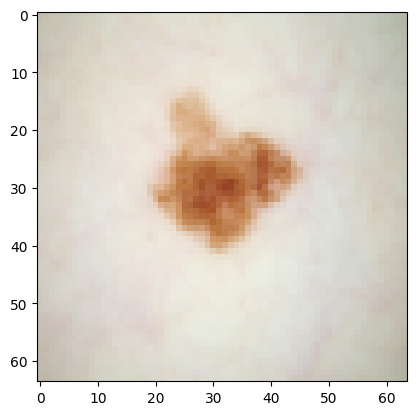

In [ ]:
n = 13
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)  # Expand dims so the input is (num images, x, y, c)

# Define the list of models for each step
step1_models = ['CNN', 'VGG16', 'ResNet', 'DenseNet']
step2_models = ['model_cnn2', 'model_vgg162', 'model_resnet2', 'model_densenet2']

for model_name, step2_model_name in zip(step1_models, step2_models):
    prediction_first = globals()[f"model_{model_name.lower()}"].predict(input_img)[0]
    if prediction_first < 0.5:
        prediction_label = "benign"
    else:
        prediction_second = globals()[step2_model_name].predict(input_img)[0]
        prediction_label = "melanoma" if prediction_second < 0.5 else "seborrheic_keratosis"

    print(f"\nThe {model_name} prediction for this image is:", prediction_label, '\n')

# Mapping the actual label to a label name
if y_test[n] == 0:
    actual_label = "benign"
else:
    actual_label = "melanoma" if y_test_step2[n] == 0 else "seborrheic_keratosis"

print("\nThe actual label for this image is:", actual_label)

### Work Done